Code for Digital Image Processing
=================================



These are the code snippets used in `Blurring Filters`
part of `Digital Image Processing`.



## Introduction



-   Today's lecture will focus on a wide variety of `Blurring Filters`.
-   Blurring filters are used for mainly cleaning out:
    -   Noise (i.e., salt and pepper)
    -   Image Restoration

For the following codes to work we must import the necessary modules and
define some functions/classes.



In [6]:
import cv2 as cv  # used in digital image analysis
import matplotlib.pyplot as plt
import matplotlib.colors  # all related to colours
from matplotlib.image import imread

### Bivariate Distribution



- Bivariate analysis is one of the simplest forms of quantitative
(statistical) analysis. It involves the analysis of two variables
(often denoted as X, Y), for the purpose of determining the empirical
relationship between them.

- Bivariate Distribution can be taught of a 2D Gaussian



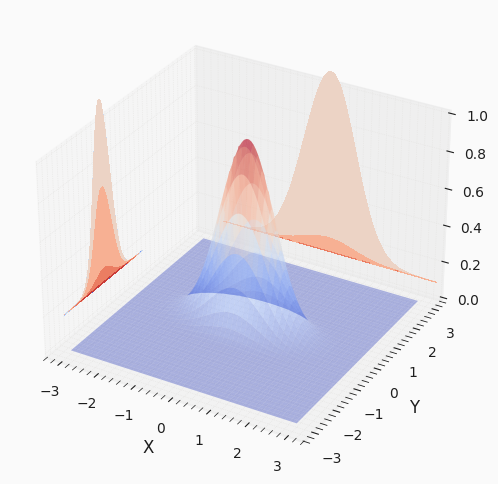

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def gauss1(x):
    return np.exp(-(x**2))

def gauss(x, y):
    return gauss1(x)*gauss1(2*y)

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(projection = '3d')
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = gauss(X, Y)

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.4, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Gaussian Blur

### Operation Principle

The Gaussian distribution provides a good launching pad. First, let's remind ourselves of its 2D form—here unnormalized. Let's assume the Gaussian of variance $\sigma$
is centered at a pixel $p$ with $x$ and $y$ coordinates, and we're sampling the PDF for a point at $q$ : $q$ is $d$ away from $q$.

$$\mathcal{N}(d) = e^{- \left( \frac{(q_x - p_x)^2 + (q_y - p_y)^2}{2\sigma^2} \right) }$$

The Gaussian filter applied at pixel in image can be written as:

$$G(p) = \frac{1}{w} \sum\limits_{q\in S} \mathcal{N} (|p-q|)I_q$$
$$w=\sum\limits_{q\in S}\mathcal{N}(|p-q|)$$

where $I_q$ is the value at pixel index $q$, and $S$ denotes a small neighborhood of pixels around $p$. The $\mathcal{N}$ denotes a Gaussian (which is also called a ormal distribution), and $w$ is the normalization factor—this preserves image brightness during filtering. 

Below is our function which is a wrapper for the opencv implementation.
This wrapper function adds some conveniece of producing and printing
images easily.



In [8]:
from skimage import data
import matplotlib.cm as cm
from skimage import filters

def gaussian_blur(sigma):
    image = data.camera()

    path = "images/Blurring-Filters/Gaussian-blur-" + str(sigma) + ".png"

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.grid(False); ax1.minorticks_off(); ax1.set_xticks([]); ax1.set_yticks([])
    ax1.imshow(image, cmap=cm.gray)

    ax2.grid(False); ax2.minorticks_off(); ax2.set_xticks([]); ax2.set_yticks([])
    ax2.imshow(filters.gaussian(image, sigma = sigma), cmap=cm.gray)

    ax1.set_xlabel('(a)', labelpad=10)
    ax2.set_xlabel('(b)', labelpad=10)

    plt.tight_layout()
    plt.grid(False)
    plt.show()
    plt.close()

Once all the necessary code is executed, it is time to plot our results.
We first invoke our test image and invoke the blur<sub>gaussian</sub> function.



### Example



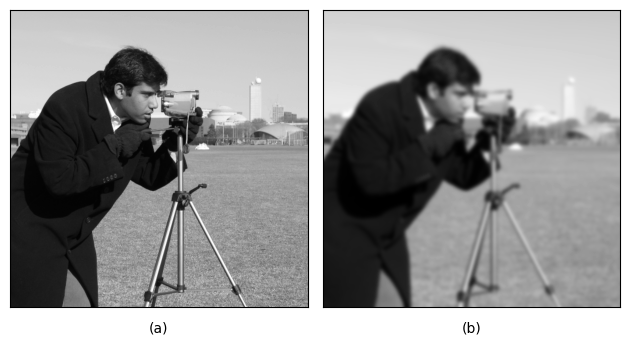

In [10]:
gaussian_blur(3)

The image is originally set with `sigma=5`. Increasing this more
would create a higher blurring effect.



## Box Filter

A box blur (also known as a box linear filter) is a spatial domain
linear filter in which each pixel in the resulting image has a value
equal to the average value of its neighboring pixels in the input image.

For example: a 3-by-3 box blur filter can be written as:

${\displaystyle {\frac {1}{9}}{\begin{bmatrix}1&1&1\\1&1&1\\1&1&1\end{bmatrix}}.}$


In [11]:
from scipy import ndimage

def box_filter_blur(size):
    image = data.camera()

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.grid(False); ax1.minorticks_off(); ax1.set_xticks([]); ax1.set_yticks([])
    ax1.imshow(image, cmap=cm.gray)

    ax2.grid(False); ax2.minorticks_off(); ax2.set_xticks([]); ax2.set_yticks([])
    ax2.imshow(ndimage.uniform_filter(image, size=size), cmap=cm.gray)

    ax1.set_xlabel('(a)', labelpad=10)
    ax2.set_xlabel('(b)', labelpad=10)

    plt.tight_layout()
    plt.grid(False)
    plt.show()
    plt.close()

## Box Filter Blur @ Size 5



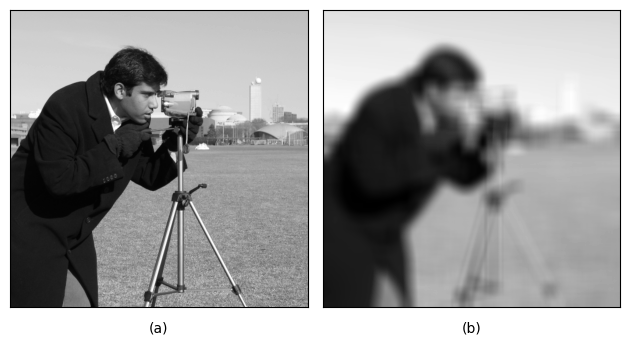

In [12]:
box_filter_blur(25)

## Motion Blur

Motion blur occurs in images captured by cameras due to movement during image exposure. When the camera is capturing a scene, it records the light entering the lens during a specific period of time, called exposure time. During this time, if there is movement in the scene, moving objects will appear blurred in the final image. There are two main types of motion that can cause motion blur:

1. Camera movement: If the camera is in motion while the image is being captured, even if very subtly, this can result in motion blur. This can occur when the photographer cannot keep the camera stable enough during image capture, or when the camera is mounted on a moving object, such as a vehicle.
2. Object movement: When an object in the scene is moving during image exposure, it will appear blurred in the direction of the movement. This is especially noticeable in low-light situations, where the camera needs a longer exposure to capture a sufficiently bright image. For example, in sports or action photography, where objects are moving quickly.

Motion blur is more pronounced in longer exposures, where there is more time for movement to cause noticeable blur. In shorter exposures, motion blur can be minimized, but it can still occur depending on the speed of movement and camera settings.

Due to its nature, it is impossible to induce motion blur in an already captured image, but it is possible to simulate this effect via code.

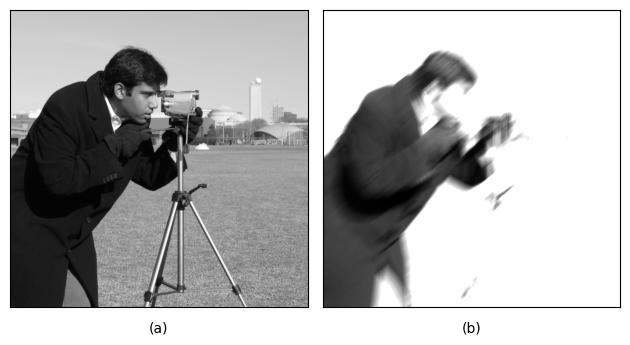

In [14]:
import numpy as np
import cv2


image = data.camera()

def motion_blur(image, kernel_size, angle):
    kernel = np.zeros((kernel_size, kernel_size))
    angle_rad = np.deg2rad(angle)
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    center = kernel_size // 2
    for i in range(kernel_size):
        x = i - center
        for j in range(kernel_size):
            y = j - center
            if np.abs(x * cos_angle + y * sin_angle) < 1:
                kernel[i, j] = 1 / kernel_size
    return cv2.filter2D(image, -1, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.grid(False); ax1.minorticks_off(); ax1.set_xticks([]); ax1.set_yticks([])
ax1.imshow(image, cmap=cm.gray)

ax2.grid(False); ax2.minorticks_off(); ax2.set_xticks([]); ax2.set_yticks([])
ax2.imshow(motion_blur(image, kernel_size = 25, angle = 40), cmap=cm.gray)

ax1.set_xlabel('(a)', labelpad=10)
ax2.set_xlabel('(b)', labelpad=10)

plt.tight_layout()
plt.grid(False)
plt.show()
plt.close()

### Median Filter



The median filter is a non-linear digital filtering technique, often used to
remove noise from an image or signal. Such noise reduction is a typical
pre-processing step to improve the results of later processing
(for example, edge detection on an image).

Median filtering is very widely used in digital image processing
because, under certain conditions, it preserves edges while removing noise.



In [1]:
from skimage import io
from skimage.filters.rank import median
from skimage.morphology import disk

def median_blur(size):
    image = data.camera()

    path = "images/Blurring-Filters/Median-blur-" + str(size) + ".png"

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.grid(False); ax1.minorticks_off(); ax1.set_xticks([]); ax1.set_yticks([])
    ax1.imshow(image, cmap=cm.gray)

    ax2.grid(False); ax2.minorticks_off(); ax2.set_xticks([]); ax2.set_yticks([])
    ax2.imshow(median(image, disk(size)) , cmap=cm.gray)

    ax1.set_xlabel('(a)', labelpad=10)
    ax2.set_xlabel('(b)', labelpad=10)

    plt.tight_layout()
    plt.grid(False)
    plt.savefig(path, bbox_inches='tight', dpi=300)
    plt.close()

In [1]:
median_blur(5)

## Bilateral Filter



- A bilateral filter is a *non-linear*, *edge-preserving*, and *noise-reducing* smoothing filter for images.
- It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.
- This weight can be based on a Gaussian distribution with a focus on preserving sharp edges. 

In [17]:
import cv2 as cv  # used in digital image analysis

Let's define a function which can automatically compute the image and compare it with its original

In [18]:
def bilateral_blur(size):
    image = data.camera()

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.grid(False); ax1.minorticks_off(); ax1.set_xticks([]); ax1.set_yticks([])
    ax1.imshow(image, cmap=cm.gray)

    ax2.grid(False); ax2.minorticks_off(); ax2.set_xticks([]); ax2.set_yticks([])
    ax2.imshow(cv.bilateralFilter(image, size, 75, 75), cmap=cm.gray)

    ax1.set_xlabel('(a)', labelpad=10)
    ax2.set_xlabel('(b)', labelpad=10)

    plt.tight_layout()
    plt.grid(False)
    plt.show()
    plt.close()

Once we have our template fnuction set up we can enter the size of the kernel to see its effect on our test image.

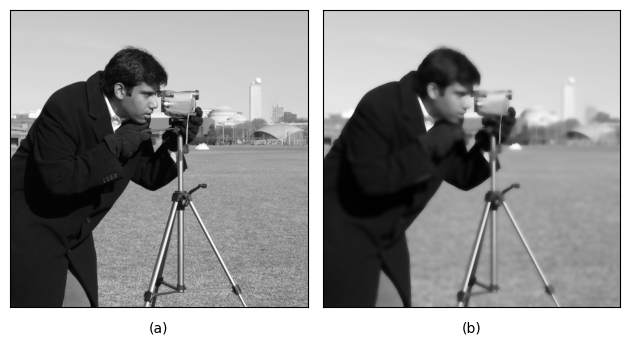

In [19]:
bilateral_blur(10)

#### Butterworth Filter



In the field of Image Processing, Butterworth Highpass
Filter (BHPF) is used for image sharpening in the frequency domain.

Image Sharpening is a technique to enhance the fine details and highlight
the edges in a digital image. It removes low-frequency components from
an image and preserves high-frequency components.



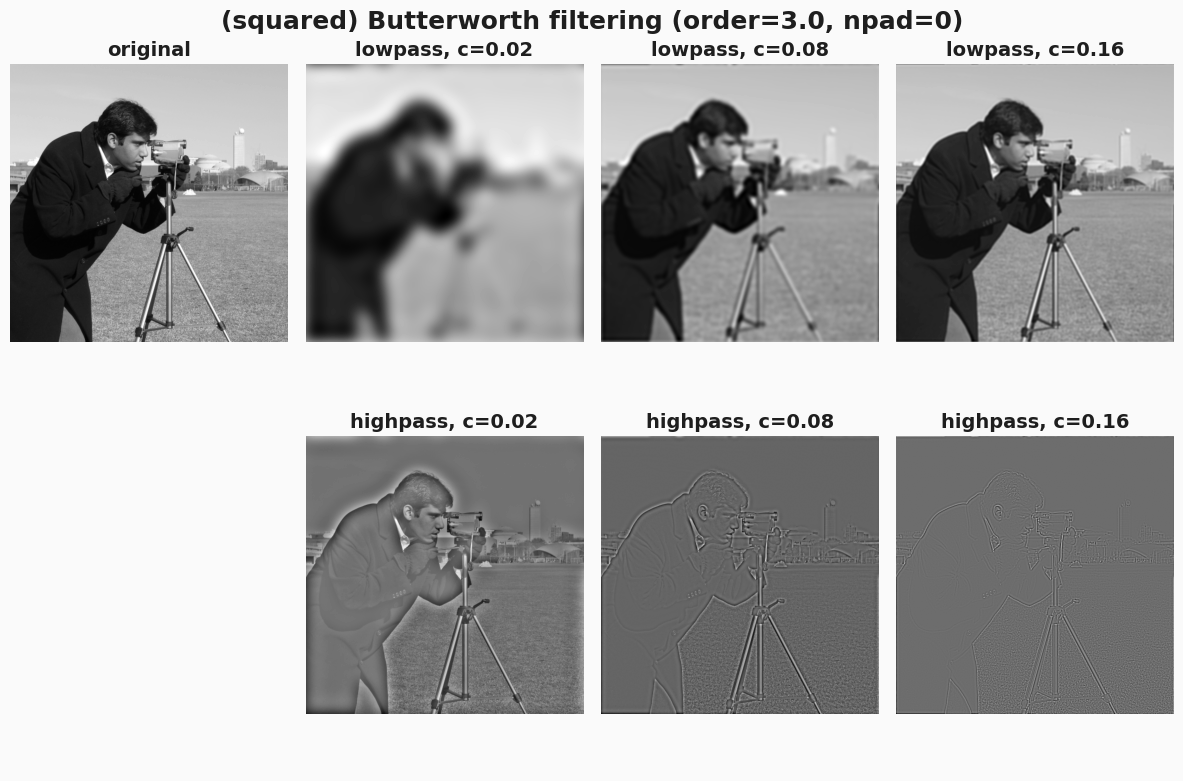

In [39]:
import matplotlib.pyplot as plt

from skimage import data, filters

image = data.camera()

# cutoff frequencies as a fraction of the maximum frequency
cutoffs = [0.02, 0.08, 0.16]


def get_filtered(image, cutoffs, squared_butterworth=True, order=3.0, npad=0):
    """Lowpass and highpass butterworth filtering at all specified cutoffs.

    Parameters
    ----------
    image : ndarray
        The image to be filtered.
    cutoffs : sequence of int
        Both lowpass and highpass filtering will be performed for each cutoff
        frequency in `cutoffs`.
    squared_butterworth : bool, optional
        Whether the traditional Butterworth filter or its square is used.
    order : float, optional
        The order of the Butterworth filter

    Returns
    -------
    lowpass_filtered : list of ndarray
        List of images lowpass filtered at the frequencies in `cutoffs`.
    highpass_filtered : list of ndarray
        List of images highpass filtered at the frequencies in `cutoffs`.
    """

    lowpass_filtered = []
    highpass_filtered = []
    for cutoff in cutoffs:
        lowpass_filtered.append(
            filters.butterworth(
                image,
                cutoff_frequency_ratio=cutoff,
                order=order,
                high_pass=False,
                squared_butterworth=squared_butterworth,
                npad=npad,
            )
        )
        highpass_filtered.append(
            filters.butterworth(
                image,
                cutoff_frequency_ratio=cutoff,
                order=order,
                high_pass=True,
                squared_butterworth=squared_butterworth,
                npad=npad,
            )
        )
    return lowpass_filtered, highpass_filtered


def plot_filtered(lowpass_filtered, highpass_filtered, cutoffs):
    """Generate plots for paired lists of lowpass and highpass images."""
    fig, axes = plt.subplots(2, 1 + len(cutoffs), figsize=(12, 8))
    fontdict = dict(fontsize=14, fontweight='bold')

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('original', fontdict=fontdict)
    axes[1, 0].set_axis_off()

    for i, c in enumerate(cutoffs):
        axes[0, i + 1].imshow(lowpass_filtered[i], cmap='gray')
        axes[0, i + 1].set_title(f'lowpass, c={c}', fontdict=fontdict)
        axes[1, i + 1].imshow(highpass_filtered[i], cmap='gray')
        axes[1, i + 1].set_title(f'highpass, c={c}', fontdict=fontdict)

    for ax in axes.ravel():
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    return fig, axes


# Perform filtering with the (squared) Butterworth filter at a range of
# cutoffs.
lowpasses, highpasses = get_filtered(image, cutoffs, squared_butterworth=True)

fig, axes = plot_filtered(lowpasses, highpasses, cutoffs)
titledict = dict(fontsize=18, fontweight='bold')
fig.text(
    0.5,
    0.95,
    '(squared) Butterworth filtering (order=3.0, npad=0)',
    fontdict=titledict,
    horizontalalignment='center',
)
plt.show()

## Unsharp masking

Unsharp masking is a linear image processing technique which sharpens the image. The sharp details are identified as a difference between the original image and its blurred version. These details are then scaled, and added back to the original image:

```enhanced image = original + amount * (original - blurred)```

The blurring step could use any image filter method, e.g. median filter, but traditionally a gaussian filter is used. The radius parameter in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

This example shows the effect of different radius and amount parameters.

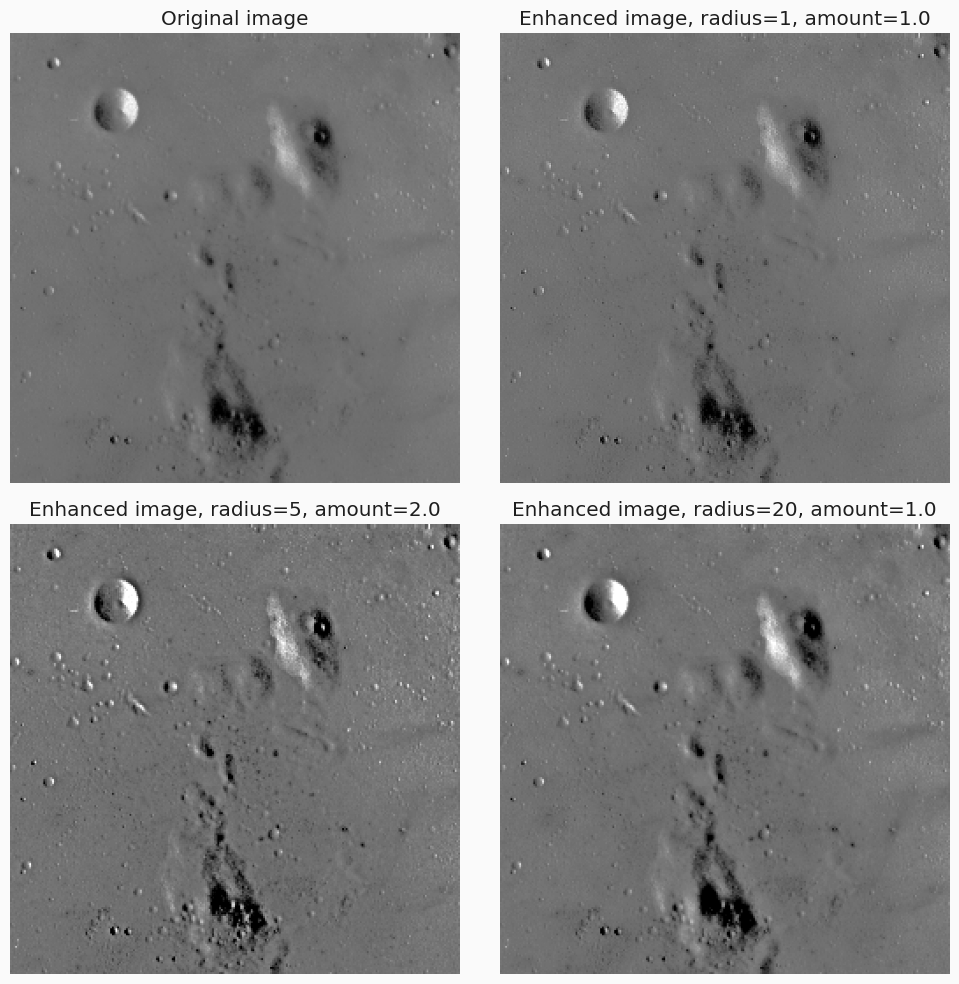

In [73]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = data.moon()
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

# Applications

## Finding an Objects Geodesic Centre

- In various image analysis situations, it is useful to think of the pixels of an image, or of a region of an image, as a network or graph, in which each pixel is connected to its neighbors (with or without diagonals).
- One such situation is finding the geodesic center of an object, which is the point closest to all other points if you are only allowed to travel on the pixels of the object, rather than in a straight line.
- This point is the one with maximal closeness centrality in the network.

In this example, we create such a pixel graph of a skeleton and find the central pixel of that skeleton.

This demonstrates its utility in contrast with the centroid (also known as the center of mass) which may actually fall outside the object.

We first start with importing the necessary libraries

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology

We start by loading the data: and image of a human retina, this is achieved by loading the ```data``` content of the
```skimage``` library. Then we do a simple plot.

_NOTE:_ the symbol ```_``` is usually reserved for non reusable loop operators.



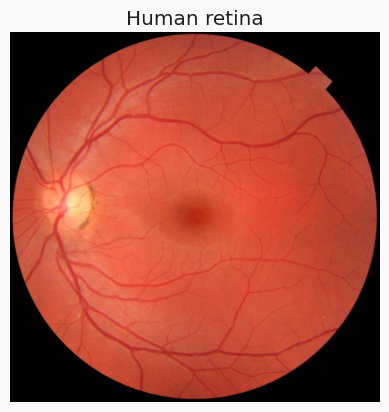

In [42]:
retina_source = data.retina()

_, ax = plt.subplots()
ax.imshow(retina_source)
ax.set_axis_off()
_ = ax.set_title('Human retina')

plt.show()

As with most digital image processing applications, we convert the image to grayscale, then use the
Sato vesselness filter to better distinguish the main vessels in the image.

*Sato vesselness filter:* This filter can be used to detect continuous ridges, e.g. tubes, wrinkles, rivers. It can be used to calculate the fraction of the whole image containing such objects.

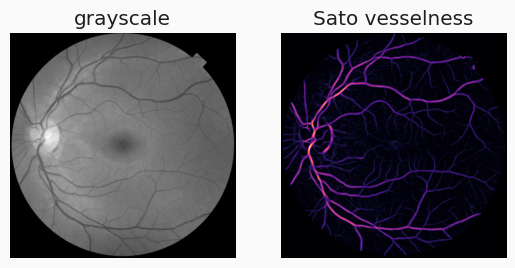

In [43]:
retina = color.rgb2gray(retina_source)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = retina > t0
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

plt.show()

Based on the observed vesselness values, we use hysteresis thresholding
to define the main vessels.

*Hysteresis Thresholding:* Hysteresis is the lagging of an effect—a kind of inertia. In the context of thresholding, it means that areas above some low threshold are considered to be above the threshold if they are also connected to areas above a higher, more stringent, threshold. They can thus be seen as continuations of these high-confidence areas.

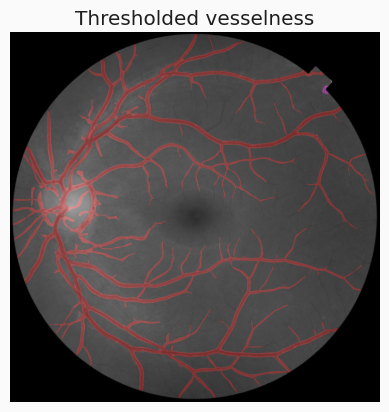

In [45]:
thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('Thresholded vesselness')

plt.show()

Finally, we can skeletonize this label image and use that as the basis to find the
central pixel in that skeleton. Compare that to the position of the centroid!



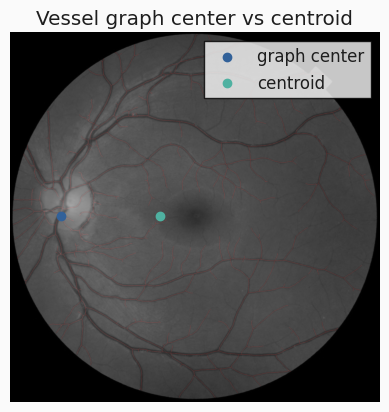

In [46]:
largest_nonzero_label = np.argmax(np.bincount(labeled[labeled > 0]))
binary = labeled == largest_nonzero_label
skeleton = morphology.skeletonize(binary)
g, nodes = graph.pixel_graph(skeleton, connectivity=2)
px, distances = graph.central_pixel(
    g, nodes=nodes, shape=skeleton.shape, partition_size=100
)

centroid = measure.centroid(labeled > 0)

_, ax = plt.subplots()
ax.imshow(color.label2rgb(skeleton, retina))
ax.scatter(px[1], px[0], label='graph center')
ax.scatter(centroid[1], centroid[0], label='centroid')
ax.legend()
ax.set_axis_off()
ax.set_title('Vessel graph center vs centroid')

plt.show()

## Rank Filters

Rank filters are non-linear filters using local gray-level ordering to compute the filtered value. This ensemble of filters share a common base: the local gray-level histogram is computed on the neighborhood of a pixel (defined by a 2D structuring element). If the filtered value is taken as the middle value of the histogram, we get the classical median filter.

Rank filters can be used for several purposes, such as:

- image quality enhancement, e.g., image smoothing, sharpening
- image pre-processing, e.g., noise reduction, contrast enhancement
- feature extraction, e.g., border detection, isolated point detection
- image post-processing, e.g., small object removal, object grouping, contour smoothing

Some well-known filters (e.g., morphological dilation and morphological erosion) are specific cases of rank filters.

In this example, we will see how to filter a gray-level image using some of the linear and non-linear filters available in skimage. We use the camera image from skimage.data for all comparisons.

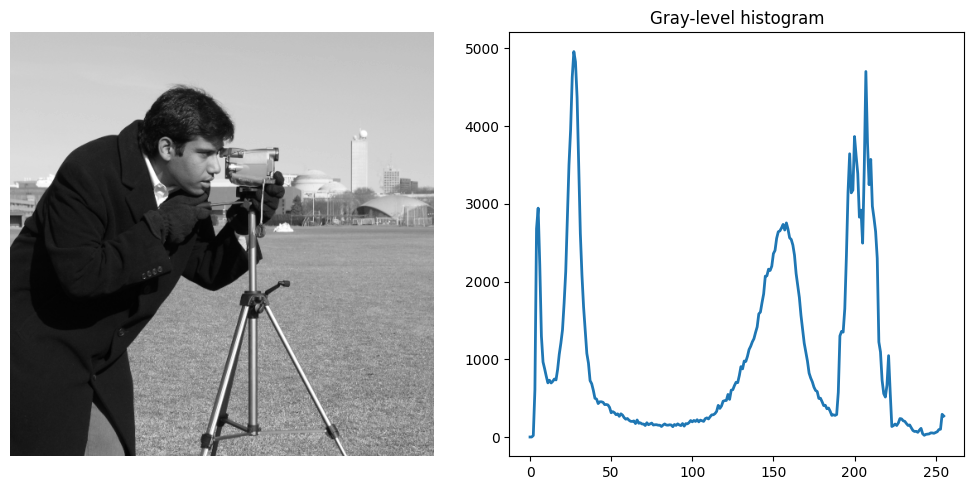

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram

noisy_image = img_as_ubyte(data.camera())
hist, hist_centers = histogram(noisy_image)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].plot(hist_centers, hist, lw=2)
ax[1].set_title('Gray-level histogram')

fig.tight_layout()

plt.show()

### Noise Removal

Some noise is added to the image: 1% of pixels are randomly
set to 255, 1% are randomly set to 0. The median filter
is applied to remove the noise.



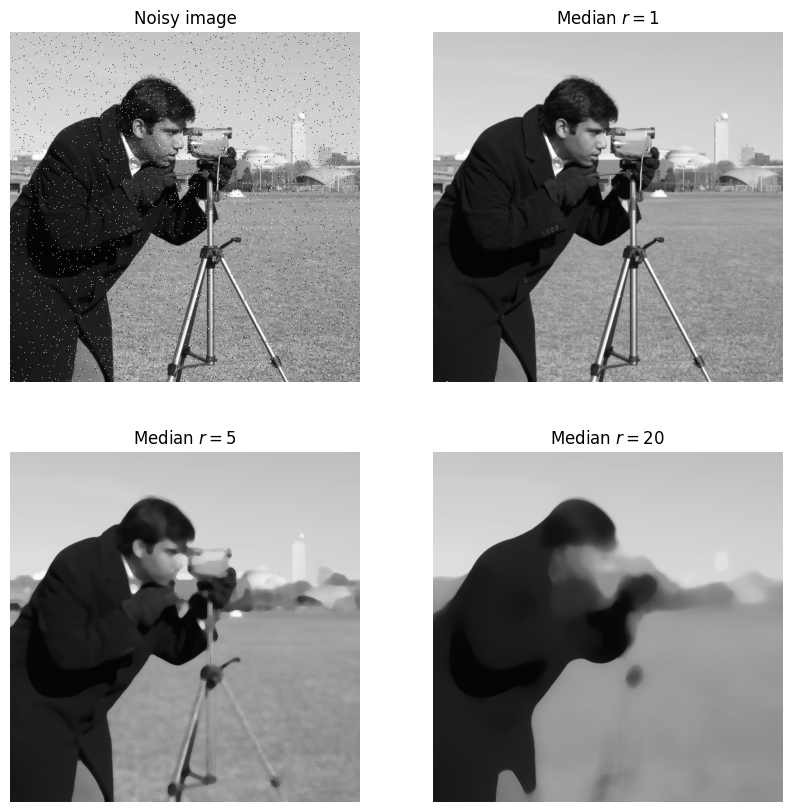

In [3]:
from skimage.filters.rank import median
from skimage.morphology import disk, ball

rng = np.random.default_rng()
noise = rng.random(noisy_image.shape)
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=1$')

ax[2].imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=5$')

ax[3].imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=20$')

for a in ax:
    a.set_axis_off()

plt.show()

- The added noise is efficiently removed, as the image
defaults are small (1-pixel wide), a small filter radius
is sufficient.

- As the radius increases, objects with bigger sizes get filtered
as well, such as the camera tripod. The median filter is often
used for noise removal because it preserves borders.

- For example, consider noise which is located only on a
few pixels in the entire image, as is the case with
salt-and-pepper noise: the median filter will
ignore the noisy pixels, for they will appear as outliers;

- Therefore, it will not change significantly the median of a
group of local pixels, in contrast to what a moving average
filter would do.



## Image Smoothing



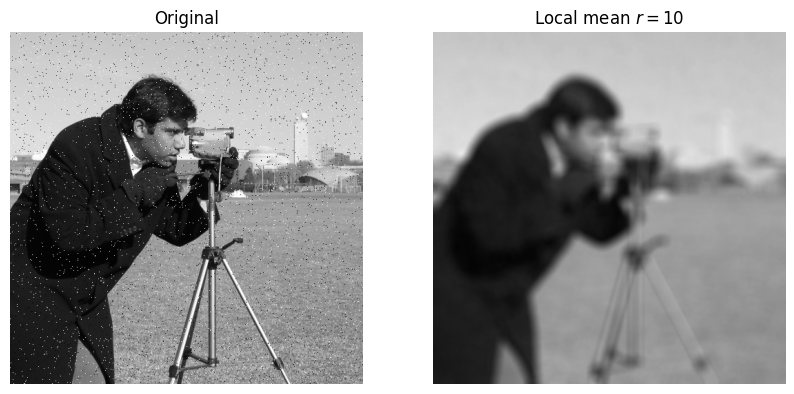

In [4]:
from skimage.filters.rank import mean

loc_mean = mean(noisy_image, disk(10))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(loc_mean, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Local mean $r=10$')

for a in ax:
    a.set_axis_off()

plt.show()

It is als important in smoothing an image while preserving
important borders (median filters already achieved this).

Here, we use the bilateral filter that restricts the local
neighborhood to pixels with gray levels similar to the central one.



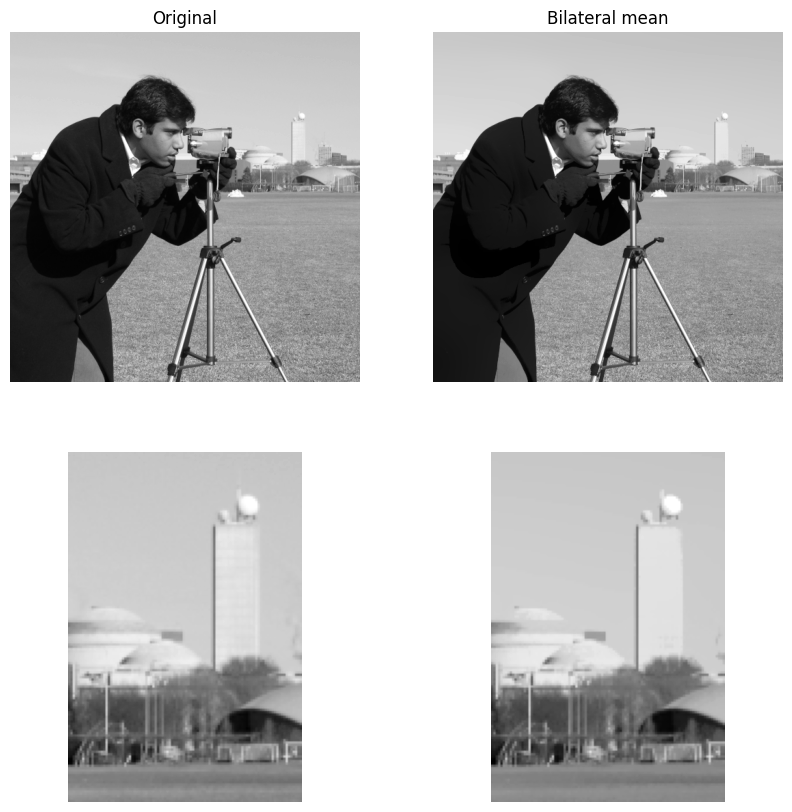

In [5]:
from skimage.filters.rank import mean_bilateral

noisy_image = img_as_ubyte(data.camera())

bilat = mean_bilateral(noisy_image.astype(np.uint16), disk(20), s0=10, s1=10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex='row', sharey='row')
ax = axes.ravel()

ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(bilat, cmap=plt.cm.gray)
ax[1].set_title('Bilateral mean')

ax[2].imshow(noisy_image[100:250, 350:450], cmap=plt.cm.gray)

ax[3].imshow(bilat[100:250, 350:450], cmap=plt.cm.gray)

for a in ax:
    a.set_axis_off()

plt.show()

One can see that the large continuous part of the image
(e.g. sky) is smoothed whereas other details are preserved.



## Contrast Enhancement



We compare here how the global histogram equalization is applied locally.

The equalized image has a roughly linear cumulative distribution
function for each pixel neighborhood.

The local version of histogram equalization emphasizes every
local gray-level variation.



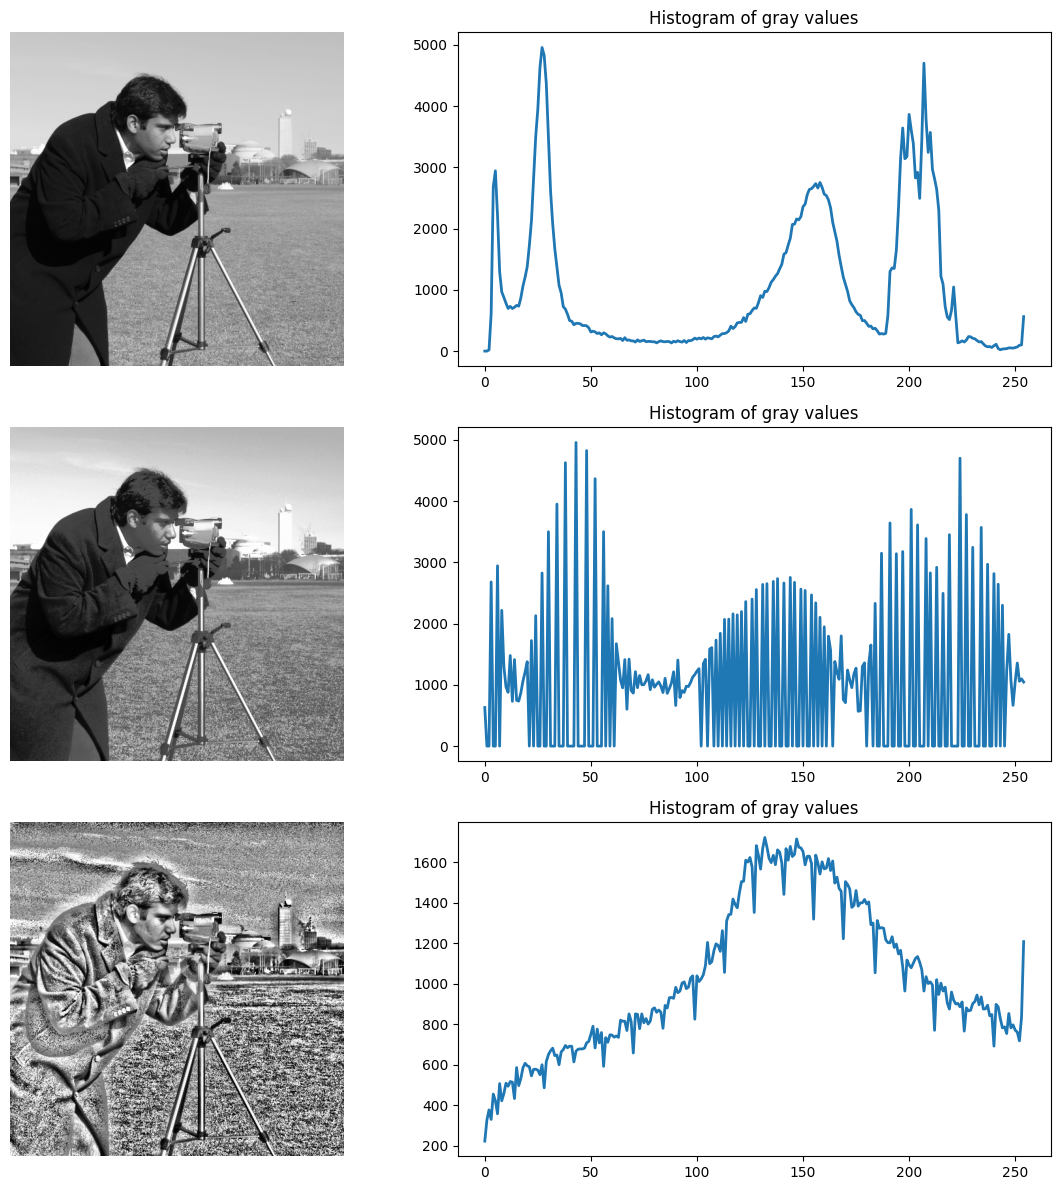

In [6]:
from skimage import exposure
from skimage.filters import rank

noisy_image = img_as_ubyte(data.camera())

# equalize globally and locally
glob = exposure.equalize_hist(noisy_image) * 255
loc = rank.equalize(noisy_image, disk(20))

# extract histogram for each image
hist = np.histogram(noisy_image, bins=np.arange(0, 256))
glob_hist = np.histogram(glob, bins=np.arange(0, 256))
loc_hist = np.histogram(loc, bins=np.arange(0, 256))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].plot(hist[1][:-1], hist[0], lw=2)
ax[1].set_title('Histogram of gray values')

ax[2].imshow(glob, cmap=plt.cm.gray)
ax[2].set_axis_off()

ax[3].plot(glob_hist[1][:-1], glob_hist[0], lw=2)
ax[3].set_title('Histogram of gray values')

ax[4].imshow(loc, cmap=plt.cm.gray)
ax[4].set_axis_off()

ax[5].plot(loc_hist[1][:-1], loc_hist[0], lw=2)
ax[5].set_title('Histogram of gray values')

fig.tight_layout()
plt.show()

## Morphological Operations



Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image, such as boundaries, skeletons, etc.

In any given technique, we probe an image with a small shape or template called a structuring element, which defines the region of interest or neighborhood around a pixel.

For this exercise we will look at the following operations:

-   Erosion
-   Dilation
-   Opening
-   Closing
-   White Tophat
-   Black Tophat
-   Skeletonize
-   Convex Hull

To get started, let’s load an image using `io.imread`.
Note that morphology functions only work on gray-scale or
binary images, so we set `as_gray=True`.



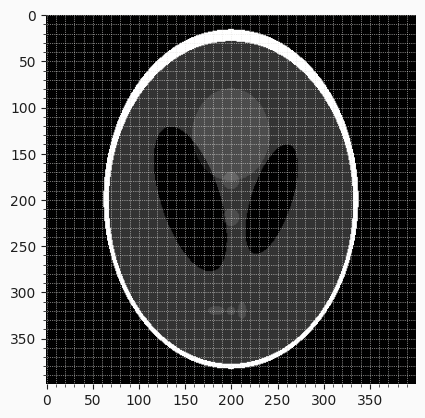

In [47]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte

orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

plt.show()

Let’s also define a convenience function for plotting comparisons:



In [49]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.set_axis_off()
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.set_axis_off()
    plt.show()

### Erosion



Morphological erosion sets a pixel at (i, j) to the minimum over all
pixels in the neighborhood centered at (i, j). The structuring element,
footprint, passed to erosion is a boolean array that describes
this neighborhood.

Below, we use disk to create a circular structuring element,
which we use for most of the following examples.



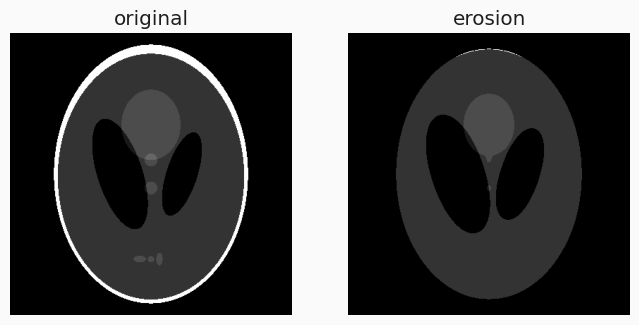

In [50]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat  # noqa
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk  # noqa

footprint = disk(6)
eroded = erosion(orig_phantom, footprint)
plot_comparison(orig_phantom, eroded, 'erosion')

Notice how the white boundary of the image disappears or gets
eroded as we increase the size of the disk.

Also notice the increase in size of the two black ellipses in the center
and the disappearance of the 3 light gray patches in the lower part of the image.



### Dilation



Morphological dilation sets a pixel at (i, j) to the maximum over all pixels
in the neighborhood centered at (i, j). Dilation enlarges bright regions and shrinks dark regions.



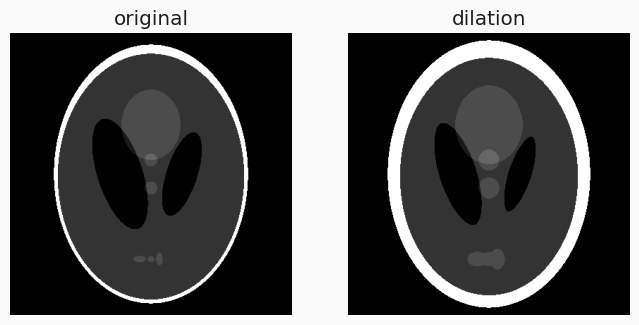

In [51]:
dilated = dilation(orig_phantom, footprint)
plot_comparison(orig_phantom, dilated, 'dilation')

Notice how the white boundary of the image thickens, or gets dilated, as we increase the size of the disk. Also notice the decrease in size of the two black ellipses in the center, and the thickening of the light gray circle in the center and the 3 patches in the lower part of the image.

### Opening

Morphological opening on an image is defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks.

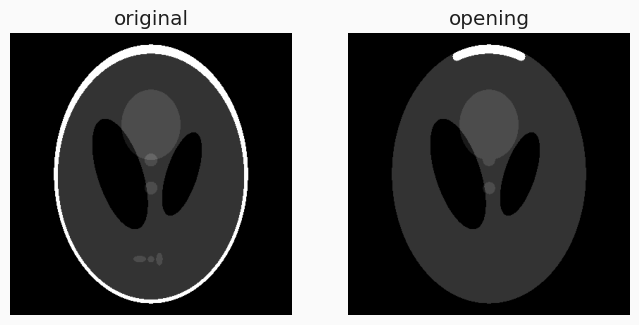

In [54]:
opened = opening(orig_phantom, footprint)
plot_comparison(orig_phantom, opened, 'opening')

Since opening an image starts with an erosion operation, light regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that light regions that are larger than the structuring element retain their original size. Notice how the light and dark shapes in the center retain their original thickness but the 3 lighter patches in the bottom get completely eroded. The size dependence is highlighted by the outer white ring: The parts of the ring thinner than the structuring element are completely erased, while the thicker region at the top retains its original thickness.

## Closing

Morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.

To illustrate this more clearly, let’s add a small crack to the white border:

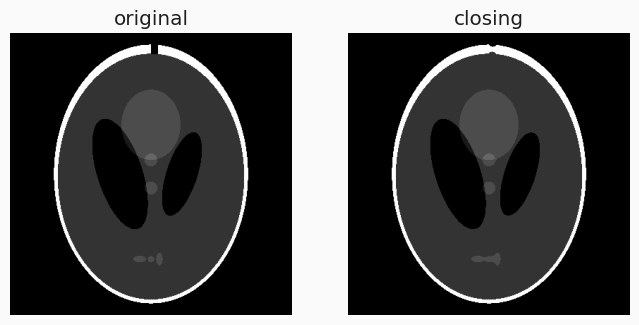

In [57]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, footprint)
plot_comparison(phantom, closed, 'closing')

## Tinting Gray-Scale Images

It can be useful to artificially tint an image with some color, either to highlight particular regions of an image or maybe just to liven up a grayscale image. This example demonstrates image-tinting by scaling RGB values and by adjusting colors in the HSV color-space.

In 2D, color images are often represented in RGB—3 layers of 2D arrays, where the 3 layers represent (R)ed, (G)reen and (B)lue channels of the image. The simplest way of getting a tinted image is to set each RGB channel to the grayscale image scaled by a different multiplier for each channel. For example, multiplying the green and blue channels by 0 leaves only the red channel and produces a bright red image. Similarly, zeroing-out the blue channel leaves only the red and green channels, which combine to form yellow.

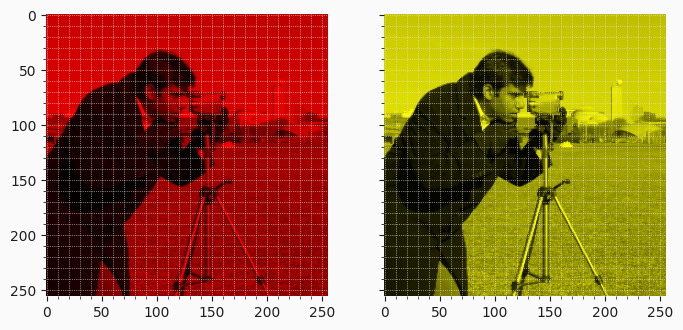

In [59]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float, img_as_ubyte

grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

plt.show()

In many cases, dealing with RGB values may not be ideal. Because of that, there are many other color spaces in which you can represent a color image. One popular color space is called HSV, which represents hue (~the color), saturation (~colorfulness), and value (~brightness). For example, a color (hue) might be green, but its saturation is how intense that green is —where olive is on the low end and neon on the high end.

In some implementations, the hue in HSV goes from 0 to 360, since hues wrap around in a circle. In scikit-image, however, hues are float values from 0 to 1, so that hue, saturation, and value all share the same scale.

Below, we plot a linear gradient in the hue, with the saturation and value turned all the way up:

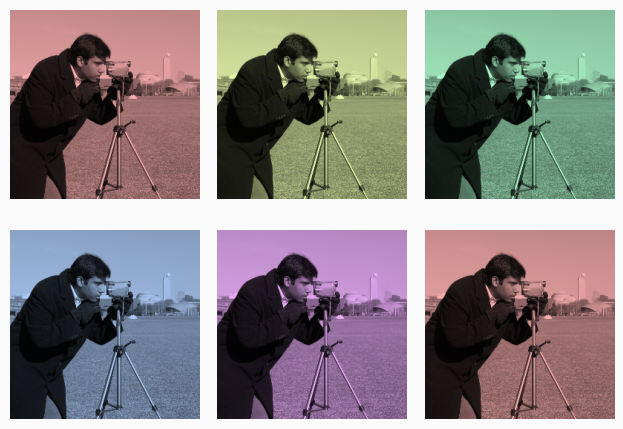

In [61]:
def colorize(image, hue, saturation=1):
    """Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)


hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()

## Region Boundary based Region adjacency graphs (RAGs)

Construct a region boundary RAG with the rag_boundary function. The function skimage.graph.rag_boundary() takes an edge_map argument, which gives the significance of a feature (such as edges) being present at each pixel. In a region boundary RAG, the edge weight between two regions is the average value of the corresponding pixels in edge_map along their shared boundary.

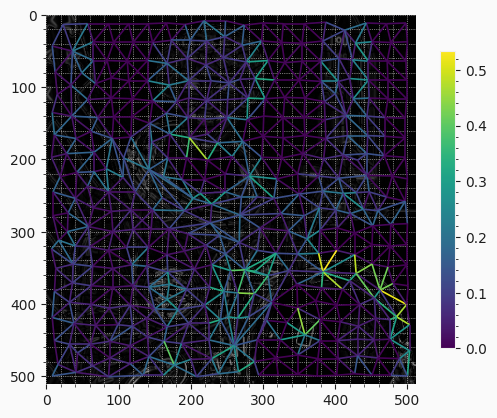

In [69]:
from skimage import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt


img = data.astronaut()
gimg = color.rgb2gray(img)

labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(
    labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=1.2
)

plt.colorbar(lc, fraction=0.03)
io.show()

## Region adjacency graph (RAG) Merging

This example constructs a Region Adjacency Graph (RAG) and progressively merges regions that are similar in color. Merging two adjacent regions produces a new region with all the pixels from the merged regions. Regions are merged until no highly similar region pairs remain.

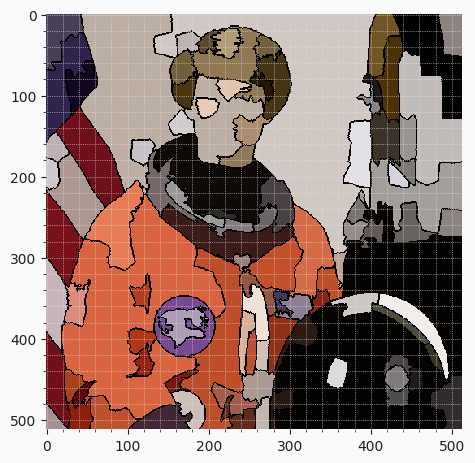

In [70]:
from skimage import data, io, segmentation, color
from skimage import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (
        graph.nodes[dst]['total color'] / graph.nodes[dst]['pixel count']
    )


img = data.astronaut()
labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(
    labels,
    g,
    thresh=35,
    rag_copy=False,
    in_place_merge=True,
    merge_func=merge_mean_color,
    weight_func=_weight_mean_color,
)

out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()